# Artifact Correction with Signal Space Projectors

### Import ✔️

In [1]:
import os
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import mne
import mne_bids
from mne.preprocessing import (create_eog_epochs, compute_proj_eog)

### Input Data

In [2]:
raw = mne.io.read_raw(pathlib.Path('out_data') / 'filtered_data' / 
                      'sub-01_ses-04_task-WM1isi500_filtered-data.fif')
events, event_id = mne.events_from_annotations(raw) 
raw.load_data()

Opening raw data file out_data\filtered_data\sub-01_ses-04_task-WM1isi500_filtered-data.fif...
    Range : 0 ... 427887 =      0.000 ...   427.887 secs
Ready.


C:\Users\trevo\AppData\Local\Temp\ipykernel_928\1479804943.py:1: RuntimeWarning: This filename (out_data\filtered_data\sub-01_ses-04_task-WM1isi500_filtered-data.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw(pathlib.Path('out_data') / 'filtered_data' /


Used Annotations descriptions: ['TsD-', 'WMD+', 'bgin', 'fix+']
Reading 0 ... 427887  =      0.000 ...   427.887 secs...


<Raw | sub-01_ses-04_task-WM1isi500_filtered-data.fif, 129 x 427888 (427.9 s), ~421.3 MB, data loaded>

### Specify EEG Data and EEG Reference

In [3]:
raw_copy = raw.copy().pick_types(meg=False, eeg=True, eog=True)
raw_copy.set_eeg_reference(ref_channels=['E129'])
raw_copy.set_channel_types({'E8': 'eog'})
raw_copy.set_channel_types({'E25': 'eog'})
len(raw_copy.ch_names)
raw_copy

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


<Raw | sub-01_ses-04_task-WM1isi500_filtered-data.fif, 129 x 427888 (427.9 s), ~421.3 MB, data loaded>

### Compute EOG Projector

In [4]:
eog_projs, _ = compute_proj_eog(raw_copy, n_grad=0, n_mag=0, n_eeg=3, reject=None,
                                no_proj=True)

Running EOG SSP computation
Using EOG channels: E8, E25
EOG channel index for this subject is: [ 7 24]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 10 significant peaks
Number of EOG events detected: 10
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-ca

### Visualize Scalp Distribution

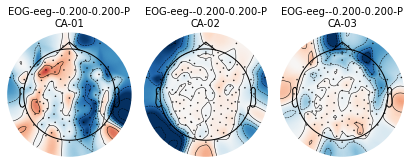

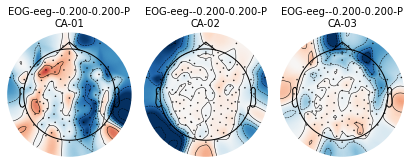

In [5]:
mne.viz.plot_projs_topomap(eog_projs, info=raw.info)

In [6]:
eog_projs

[<Projection | EOG-eeg--0.200-0.200-PCA-01, active : False, n_channels : 127, exp. var : 99.98%>,
 <Projection | EOG-eeg--0.200-0.200-PCA-02, active : False, n_channels : 127, exp. var : 0.02%>,
 <Projection | EOG-eeg--0.200-0.200-PCA-03, active : False, n_channels : 127, exp. var : 0.00%>]

### Check Epoch Quality

In [7]:
old_epochs = mne.read_epochs(pathlib.Path('out_data')
            / 'epochs' / 'sub-01_ses-04_task-WM1isi500_epochs-epo.fif')
old_epochs

Reading C:\Users\trevo\Desktop\Lab_Files\MNE_Files\E5_Data_Structure\out_data\epochs\sub-01_ses-04_task-WM1isi500_epochs-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     800.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
527 matching events found
No baseline correction applied
0 projection items activated


Number of events,527
Events,TsD-: 131WMD+: 132bgin: 132fix+: 132
Time range,-0.250 – 0.800 sec
Baseline,-0.250 – 0.000 sec


### Reject Bad Epochs ❌


In [8]:
reject_criteria = dict(eeg=100e-6) # 100 µV, what should our rejection criteria be? 
#flat_criteria = dict(eeg=1e-6)           # 1 µV

old_epochs.drop_bad(reject=reject_criteria)
#epochs.drop_bad(reject=reject_criteria, flat=flat_criteria)

    Rejecting  epoch based on EEG : ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E18', 'E19', 'E20', 'E21', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E40', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49', 'E50', 'E51', 'E53', 'E54', 'E55', 'E56', 'E57', 'E59', 'E60', 'E61', 'E62', 'E63', 'E64', 'E66', 'E67', 'E68', 'E69', 'E70', 'E71', 'E72', 'E73', 'E74', 'E75', 'E76', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E123', 'E124', 'E125', 'E126', 'E127', 'E128']
    Rejecting  epoch based on EEG : ['E1', 'E2', 'E3', 'E4', 'E6', 'E7', 'E8', 'E9', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E18', 'E19',

Number of events,255
Events,TsD-: 52WMD+: 57bgin: 52fix+: 94
Time range,-0.250 – 0.800 sec
Baseline,-0.250 – 0.000 sec


### Apply Signal Space Projector

In [9]:
raw_copy.add_proj(eog_projs)
raw_copy.apply_proj()

3 projection items deactivated
Created an SSP operator (subspace dimension = 3)
3 projection items activated
SSP projectors applied...


<Raw | sub-01_ses-04_task-WM1isi500_filtered-data.fif, 129 x 427888 (427.9 s), ~421.3 MB, data loaded>

### Epoching New Raw Data 

In [10]:
tmin = -0.25 #300 ms before the event
tmax = 0.8 #500 ms after the onset

new_epochs = mne.Epochs(raw_copy,
                    events=events,
                    event_id=event_id,
                    tmin=tmin,
                    tmax=tmax,
                    preload=True)
new_epochs

Not setting metadata
528 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 528 events and 1051 original time points ...
1 bad epochs dropped


Number of events,527
Events,TsD-: 131WMD+: 132bgin: 132fix+: 132
Time range,-0.250 – 0.800 sec
Baseline,-0.250 – 0.000 sec


### Reject Bad Epochs

In [11]:
reject_criteria = dict(eeg=100e-6) # 100 µV, what should our rejection criteria be? 
#flat_criteria = dict(eeg=1e-6)           # 1 µV

new_epochs.drop_bad(reject=reject_criteria)
#epochs.drop_bad(reject=reject_criteria, flat=flat_criteria)

    Rejecting  epoch based on EEG : ['E55', 'E68', 'E69', 'E71', 'E80', 'E88', 'E114']
    Rejecting  epoch based on EEG : ['E62']
    Rejecting  epoch based on EEG : ['E62']
    Rejecting  epoch based on EEG : ['E62']
    Rejecting  epoch based on EEG : ['E114']
    Rejecting  epoch based on EEG : ['E44']
    Rejecting  epoch based on EEG : ['E44']
    Rejecting  epoch based on EEG : ['E55', 'E62', 'E80']
    Rejecting  epoch based on EEG : ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E9', 'E10', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E26', 'E27', 'E28', 'E29', 'E30', 'E33', 'E34', 'E35', 'E37', 'E39', 'E40', 'E41', 'E42', 'E43', 'E45', 'E46', 'E47', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58', 'E59', 'E61', 'E62', 'E63', 'E64', 'E65', 'E66', 'E68', 'E69', 'E70', 'E71', 'E73', 'E74', 'E75', 'E76', 'E79', 'E80', 'E81', 'E82', 'E85', 'E88', 'E89', 'E90', 'E91', 'E94', 'E95', 'E96', 'E99', 'E100', 'E101', 'E102', 'E103

Number of events,305
Events,TsD-: 63WMD+: 72bgin: 63fix+: 107
Time range,-0.250 – 0.800 sec
Baseline,-0.250 – 0.000 sec


### Old vs New Epoch Rejection Rate

In [12]:
old_epochs

Number of events,255
Events,TsD-: 52WMD+: 57bgin: 52fix+: 94
Time range,-0.250 – 0.800 sec
Baseline,-0.250 – 0.000 sec


In [13]:
new_epochs

Number of events,305
Events,TsD-: 63WMD+: 72bgin: 63fix+: 107
Time range,-0.250 – 0.800 sec
Baseline,-0.250 – 0.000 sec


In [14]:
new_epochs.plot()

Using qt as 2D backend.
Opening epochs-browser...
